<a href="https://colab.research.google.com/github/satwikakallem/classwork-Coapps/blob/main/Home_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

# Step 1: Create a random tensor of shape (4, 6)
tensor = tf.random.uniform(shape=(4, 6))

# Step 2: Find rank and shape
rank = tf.rank(tensor)
shape = tf.shape(tensor)
print(f"Original Tensor Rank: {rank.numpy()}")
print(f"Original Tensor Shape: {shape.numpy()}")

# Step 3: Reshape to (2, 3, 4)
reshaped_tensor = tf.reshape(tensor, (2, 3, 4))
print(f"Reshaped Tensor Shape: {reshaped_tensor.shape}")

# Step 4: Transpose to (3, 2, 4)
transposed_tensor = tf.transpose(reshaped_tensor, perm=[1, 0, 2])
print(f"Transposed Tensor Shape: {transposed_tensor.shape}")

# Step 5: Broadcasting a smaller tensor (1, 4) to match a larger tensor
small_tensor = tf.random.uniform(shape=(1, 4))
large_tensor = tf.random.uniform(shape=(3, 2, 4))

# Broadcasting and addition
broadcasted_sum = large_tensor + small_tensor
print(f"Broadcasted Tensor Shape: {broadcasted_sum.shape}")

# Explanation of Broadcasting:
# Broadcasting allows tensors of different shapes to be automatically expanded
# to match each other in shape when performing element-wise operations. TensorFlow
# follows NumPy's broadcasting rules: dimensions of size 1 are stretched to match
# the larger tensor without actual data replication.


Original Tensor Rank: 2
Original Tensor Shape: [4 6]
Reshaped Tensor Shape: (2, 3, 4)
Transposed Tensor Shape: (3, 2, 4)
Broadcasted Tensor Shape: (3, 2, 4)


MSE Loss for y_pred1: 0.02500000223517418
MSE Loss for y_pred2: 0.125
CCE Loss for y_pred1: 1.7147984504699707
CCE Loss for y_pred2: 2.2537949085235596


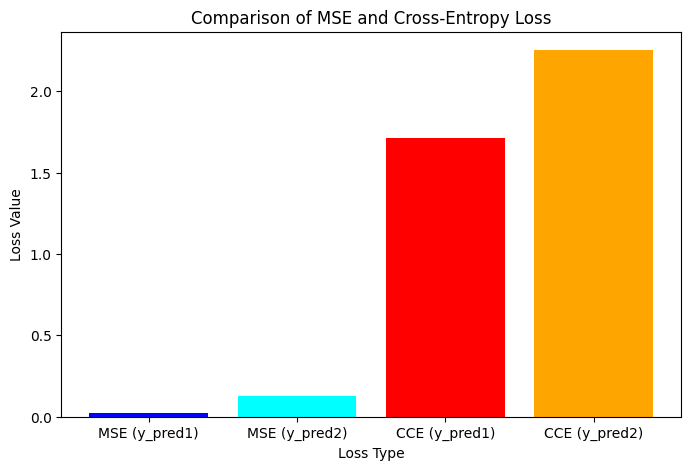

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define true values and model predictions
y_true = tf.constant([1, 0, 0, 1], dtype=tf.float32)
y_pred1 = tf.constant([0.9, 0.1, 0.2, 0.8], dtype=tf.float32)
y_pred2 = tf.constant([0.7, 0.3, 0.4, 0.6], dtype=tf.float32)

# Step 2: Compute Mean Squared Error (MSE) and Categorical Cross-Entropy (CCE) losses
mse1 = tf.keras.losses.MeanSquaredError()(y_true, y_pred1)
mse2 = tf.keras.losses.MeanSquaredError()(y_true, y_pred2)
cce1 = tf.keras.losses.CategoricalCrossentropy()(y_true, y_pred1)
cce2 = tf.keras.losses.CategoricalCrossentropy()(y_true, y_pred2)

# Step 3: Print loss values
print(f"MSE Loss for y_pred1: {mse1.numpy()}")
print(f"MSE Loss for y_pred2: {mse2.numpy()}")
print(f"CCE Loss for y_pred1: {cce1.numpy()}")
print(f"CCE Loss for y_pred2: {cce2.numpy()}")

# Step 4: Plot loss function values
labels = ['MSE (y_pred1)', 'MSE (y_pred2)', 'CCE (y_pred1)', 'CCE (y_pred2)']
values = [mse1.numpy(), mse2.numpy(), cce1.numpy(), cce2.numpy()]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'cyan', 'red', 'orange'])
plt.xlabel('Loss Type')
plt.ylabel('Loss Value')
plt.title('Comparison of MSE and Cross-Entropy Loss')
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8780 - loss: 0.4330 - val_accuracy: 0.9619 - val_loss: 0.1288
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9665 - loss: 0.1154 - val_accuracy: 0.9691 - val_loss: 0.1014
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9780 - loss: 0.0761 - val_accuracy: 0.9759 - val_loss: 0.0793
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9824 - loss: 0.0566 - val_accuracy: 0.9736 - val_loss: 0.0866
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9867 - loss: 0.0424 - val_accuracy: 0.9806 - val_loss: 0.0691
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7355 - loss: 1.0055 - val_accuracy: 0.9031 - val_loss: 0.3589
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9024 - loss: 0.3507 - val_accuracy: 0.9175 - val_loss: 0.2963
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9147 - loss: 0.3001 - val_accu

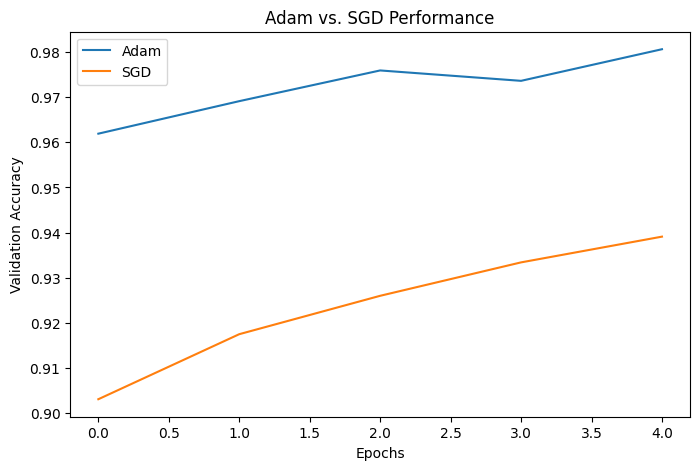

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a simple neural network model
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Train with Adam optimizer
model_adam = create_model()
model_adam.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_adam = model_adam.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Train with SGD optimizer
model_sgd = create_model()
model_sgd.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_sgd = model_sgd.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Plot accuracy comparison
plt.figure(figsize=(8, 5))
plt.plot(history_adam.history['val_accuracy'], label='Adam')
plt.plot(history_sgd.history['val_accuracy'], label='SGD')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Adam vs. SGD Performance')
plt.legend()
plt.show()


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8752 - loss: 0.4344 - val_accuracy: 0.9566 - val_loss: 0.1423
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9634 - loss: 0.1283 - val_accuracy: 0.9699 - val_loss: 0.1018
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9747 - loss: 0.0825 - val_accuracy: 0.9706 - val_loss: 0.0923
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9819 - loss: 0.0614 - val_accuracy: 0.9761 - val_loss: 0.0765
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9862 - loss: 0.0474 - val_accuracy: 0.9737 - val_loss: 0.0837
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7380 - loss: 1.0365 - val_accuracy: 0.9040 - val_loss: 0.3542
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9054 - loss: 0.3482 - val_accuracy: 0.9198 - val_loss: 0.2884
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9187 - loss: 0.2902 - val_a

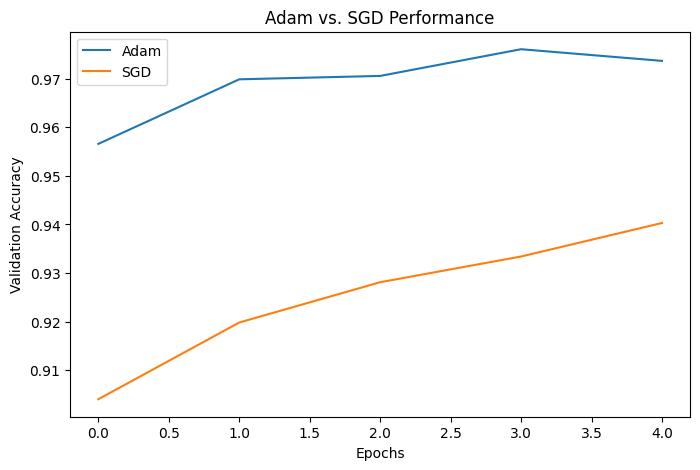

Run the following command to launch TensorBoard:
tensorboard --logdir=logs/fit


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a simple neural network model
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Setup TensorBoard logging
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train with Adam optimizer
model_adam = create_model()
model_adam.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_adam = model_adam.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), callbacks=[tensorboard_callback])

# Train with SGD optimizer
model_sgd = create_model()
model_sgd.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_sgd = model_sgd.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), callbacks=[tensorboard_callback])

# Plot accuracy comparison
plt.figure(figsize=(8, 5))
plt.plot(history_adam.history['val_accuracy'], label='Adam')
plt.plot(history_sgd.history['val_accuracy'], label='SGD')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Adam vs. SGD Performance')
plt.legend()
plt.show()

# Instructions to launch TensorBoard
print("Run the following command to launch TensorBoard:")
print("tensorboard --logdir=logs/fit")
